###  查看数据结构

In [2]:
import pandas as pd
import os
WEATHER_PATH = './datasets'
def load_weather_data(weather_path):
    csv_path = os.path.join(weather_path,"weather.csv")
    return pd.read_csv(csv_path)

In [3]:
weather = load_weather_data(WEATHER_PATH)
print(weather.columns)
print(weather.info())
print(weather.describe())

Index(['date', 'station', 'city', 'county', 'pressure', 'wind_speed',
       'wind_direction', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'phenomenon', 'sunny', 'cloudy', 'rain', 'fog',
       'haze', 'dust', 'thunder', 'lightning', 'snow', 'hail', 'wind'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102655 entries, 0 to 102654
Data columns (total 25 columns):
date              102655 non-null int64
station           102655 non-null object
city              102655 non-null object
county            102655 non-null object
pressure          102655 non-null float64
wind_speed        102655 non-null float64
wind_direction    102655 non-null int64
temperature       102655 non-null float64
humidity          102655 non-null float64
rain20            102655 non-null float64
rain08            102655 non-null float64
cloud             102655 non-null float64
visibility        102655 non-null int64
phenomenon        102655 non-null obje

In [4]:
# # 处理时间属性
import numpy as np
# print(weather["cloud"].describe())
date = pd.to_datetime(weather['date'].apply(lambda x: str(x)))
weather['year'] =date.dt.year
weather['month'] = date.dt.month
weather['week'] = date.dt.weekofyear
weather['quarter'] = date.dt.to_period('Q').astype('str')[:-2].apply(lambda x:x[-1]).astype('int')
weather['day'] = date.dt.dayofyear
# 将无效数据替换成NAN
weather[weather==999999] = np.NaN
weather[weather==999990] = np.NaN
# 去掉wind_direction和phenomenon属性
weather = weather.drop(["wind_direction","phenomenon"],axis=1)
print(weather.describe())
# print(weather.columns)
# weather.to_csv('new_cleanweather.csv')

               date       pressure     wind_speed    temperature  \
count  1.026550e+05  102164.000000  102642.000000  102372.000000   
mean   2.015097e+07     987.637546       3.830137      16.581338   
std    1.415813e+04      27.775018       1.708854       9.182736   
min    2.013010e+07       0.000000       0.000000     -19.000000   
25%    2.014041e+07     969.200000       2.600000       9.600000   
50%    2.015072e+07     987.500000       3.500000      17.630000   
75%    2.016101e+07    1010.000000       4.700000      23.900000   
max    2.017123e+07    1041.300000      17.800000      36.500000   

            humidity        rain20        rain08         cloud     visibility  \
count  102365.000000  98670.000000  98402.000000  40687.000000  100130.000000   
mean       71.050372      3.083463      3.086780     68.469074    5937.232767   
std        17.914230     10.050933      9.846583     34.377992    6741.637922   
min         0.000000      0.000000      0.000000      0.000000 

### 创建测试集合

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 创建测试集合
# np.random.seed(42) # 使每个笔记本运行时输出相同
# # print(weather["phenomenon"].value_counts())
# weather["phenomenon"].hist()
# # 根据气象类型进行分层抽样
# from sklearn.model_selection import StratifiedShuffleSplit
# ss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# for train_index, test_index in ss.split(weather,weather["phenomenon"]):
#     strat_train_set = weather.loc[train_index]
#     strat_test_set = weather.loc[test_index]
# print(strat_test_set["phenomenon"].value_counts()/len(strat_test_set))
# print(weather["phenomenon"].value_counts()/len(weather))

### 数据可视化

In [6]:
import matplotlib
matplotlib.rcParams['font.sans-serif']=['Droid Sans Fallback'] #用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 绘制某个属性关于季度和地理位置的变化情况
def plot_of_quarter_city(X,attribe):
    # 将属性按照季度和城市分组
    df_group = X[attribe].groupby([X['quarter'],X['city']]).mean()
    # 对多级索引中的city进行重命名
    df_group = df_group.rename({'重庆市':'chongqing','北京市':'beijing','上海市':'shanghai'},axis='index')
    # 将series 按照city展开成一个表格
    pop_df = df_group.unstack()
    return pop_df

weather.describe()

,date,pressure,wind_speed,temperature,humidity,rain20,rain08,cloud,visibility,sunny,...,thunder,lightning,snow,hail,wind,year,month,week,quarter,day
count,1.026550e+05,102164.000000,102642.000000,102372.000000,102365.000000,98670.000000,98402.000000,40687.000000,100130.000000,102655.000000,...,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102653.000000,102655.000000
mean,2.015097e+07,987.637546,3.830137,16.581338,71.050372,3.083463,3.086780,68.469074,5937.232767,0.244956,...,0.010384,0.011047,0.014865,0.002445,0.010569,2015.030442,6.535765,26.670342,2.512347,183.479821
std,1.415813e+04,27.775018,1.708854,9.182736,17.914230,10.050933,9.846583,34.377992,6741.637922,0.430063,...,0.101373,0.104522,0.121014,0.049388,0.102263,1.415439,3.450631,15.070427,1.117836,105.471395
min,2.013010e+07,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,1.000000
25%,2.014041e+07,969.200000,2.600000,9.600000,62.000000,0.000000,0.000000,40.000000,1500.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,4.000000,14.000000,2.000000,92.000000
50%,2.015072e+07,987.500000,3.500000,17.630000,74.500000,0.000000,0.000000,80.000000,3401.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,7.000000,27.000000,3.000000,184.000000
75%,2.016101e+07,1010.000000,4.700000,23.900000,84.000000,0.900000,1.100000,100.000000,8000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,10.000000,40.000000,4.000000,275.000000
max,2.017123e+07,1041.300000,17.800000,36.500000,100.000000,268.399900,258.899900,103.330000,50000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,53.000000,4.000000,365.000000


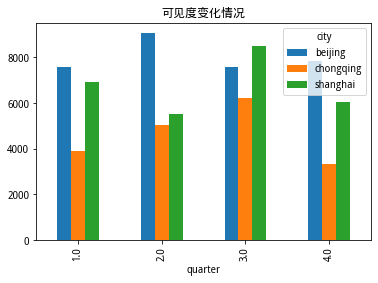

In [7]:
# 每个城市在每个季度的可见度
df_vb_group1 = plot_of_quarter_city(weather,'visibility')
# 对多级索引重新命名
df_vb_group1.plot(kind='bar')
plt.title("可见度变化情况")
plt.show()

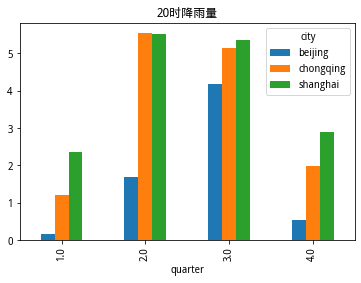

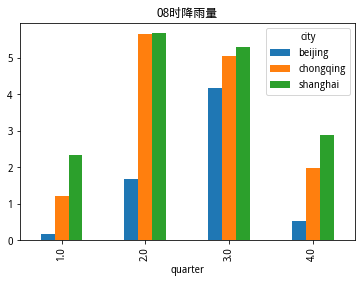

In [8]:
# 绘制降雨量
df_rain20_group = plot_of_quarter_city(weather,'rain20')
df_rain20_group.plot(kind='bar')
plt.title("20时降雨量")
df_rain08_group = plot_of_quarter_city(weather,'rain08')
df_rain08_group.plot(kind='bar')
plt.title("08时降雨量")
plt.show()

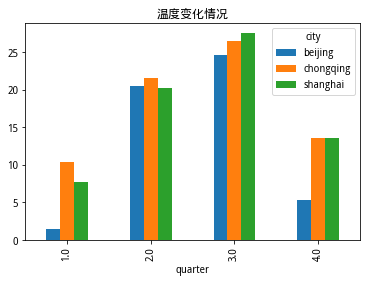

In [9]:
## 温度变化情况
df_tempature_group = plot_of_quarter_city(weather,'temperature')
df_tempature_group.plot(kind='bar')
plt.title("温度变化情况")
plt.show()

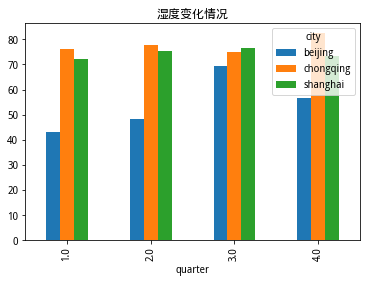

In [10]:
## 湿度变化情况
df_humidity_group = plot_of_quarter_city(weather,'humidity')
df_humidity_group.plot(kind='bar')
plt.title("湿度变化情况")
plt.show()

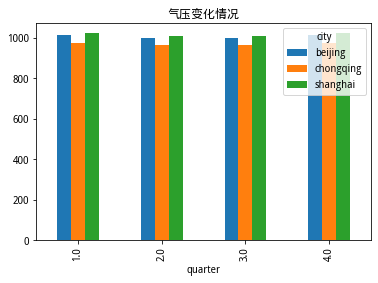

In [11]:
## 气压变化情况
df_pressure_group = plot_of_quarter_city(weather,'pressure')
df_pressure_group.plot(kind='bar')
plt.title("气压变化情况")
plt.show()

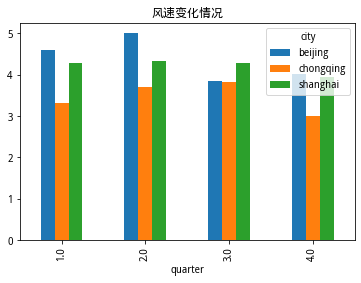

In [12]:
## 风速变化情况
df_windspeed_group = plot_of_quarter_city(weather,'wind_speed')
df_windspeed_group.plot(kind='bar')
plt.title("风速变化情况")
plt.show()

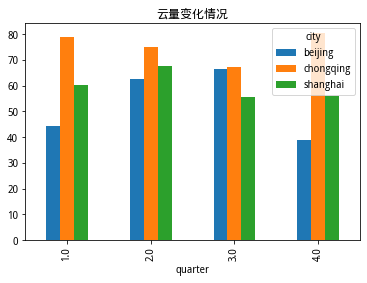

In [13]:
## 云量变化情况
df_cloud_group = plot_of_quarter_city(weather,'cloud')
df_cloud_group.plot(kind='bar')
plt.title("云量变化情况")
plt.show()

In [14]:
## 各个属性相互之间的相关性
# from pandas.plotting import scatter_matrix
# attributes = ['wind_speed','temperature', 'humidity', 'rain20', 'cloud', 'visibility']
# scatter_matrix(weather[attributes],figsize=(12,8))
# plt.show()

### 数据准备

In [15]:
# 将数据和标签分开
weather1 = weather.copy()

# 只保留数值属性
direct_useful_weather=weather1.drop(["date","station","city","county",'year'],axis=1)

print(direct_useful_weather.describe())
sample_incomplete_rows = direct_useful_weather[direct_useful_weather.isnull().any(axis=1)].head()
print(sample_incomplete_rows)

            pressure     wind_speed    temperature       humidity  \
count  102164.000000  102642.000000  102372.000000  102365.000000   
mean      987.637546       3.830137      16.581338      71.050372   
std        27.775018       1.708854       9.182736      17.914230   
min         0.000000       0.000000     -19.000000       0.000000   
25%       969.200000       2.600000       9.600000      62.000000   
50%       987.500000       3.500000      17.630000      74.500000   
75%      1010.000000       4.700000      23.900000      84.000000   
max      1041.300000      17.800000      36.500000     100.000000   

             rain20        rain08         cloud     visibility          sunny  \
count  98670.000000  98402.000000  40687.000000  100130.000000  102655.000000   
mean       3.083463      3.086780     68.469074    5937.232767       0.244956   
std       10.050933      9.846583     34.377992    6741.637922       0.430063   
min        0.000000      0.000000      0.000000       

In [16]:
# ## 数据清理
# from sklearn.impute import SimpleImputer
# # 使用中位数进行填充
# imputer = SimpleImputer(strategy='median')
# # 将imputer实例适配到数据集
# imputer.fit(direct_useful_weather)
# # 存放每个属性的中位数值
# print(imputer.statistics_)
# # 将imputer应用于所有数值属性
# X = imputer.transform(direct_useful_weather)
# # 将清理后的数据放回去
# weather_tr = pd.DataFrame(X,columns=direct_useful_weather.columns,index=weather.index)
# print(weather_tr.describe())
# weather_tr.loc[sample_incomplete_rows.index.values]
# direct_useful_weather[weather_tr.columns] = weather_tr
# print(direct_useful_weather.describe())

In [17]:
# # # 将标签转化为onhot编码
# from sklearn.preprocessing import OneHotEncoder
# ph_encoder = OneHotEncoder(sparse=False)
# weather_label_1hot = ph_encoder.fit_transform(weather1_label)
# print(weather_label_1hot)
# print(ph_encoder.categories_)

In [18]:
# # 转换流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),# 处理缺失值
    ('std_scaler',MinMaxScaler()),# 标准化
])

In [19]:
print(direct_useful_weather.shape)
print(direct_useful_weather.columns)
# 处理数值和文本属性的流水线
from sklearn.compose import ColumnTransformer
num_attribs = list(direct_useful_weather.columns)
print(len(num_attribs))
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("city",OneHotEncoder(),["city"]),
])
print(weather1["quarter"].value_counts())
weather_prepared = full_pipeline.fit_transform(weather1)
weather_prepared = pd.DataFrame(weather_prepared,columns=num_attribs+['shanghai', 'beijing', 'chongqin'])
print(weather_prepared.head())  # 23 + 3(city) 

(102655, 23)
Index(['pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning', 'snow', 'hail', 'wind', 'month', 'week',
       'quarter', 'day'],
      dtype='object')
23
4.0    26010
3.0    25875
2.0    25467
1.0    25301
Name: quarter, dtype: int64
   pressure  wind_speed  temperature  humidity  rain20  rain08     cloud  \
0  0.921060    0.191011     0.450450      0.48     0.0     0.0  0.029033   
1  0.924421    0.365169     0.443243      0.59     0.0     0.0  0.338721   
2  0.925670    0.230337     0.448649      0.44     0.0     0.0  0.000000   
3  0.927014    0.123596     0.380180      0.68     0.0     0.0  0.000000   
4  0.930472    0.095506     0.410811      0.61     0.0     0.0  0.000000   

   visibility  sunny  cloudy  ...  snow  hail  wind  month  week  quarter  \
0        0.16    1.0     1.0  ...   0.0   0.0   0.0    0.0   0.0      0.0   
1        0.30

### 预测温度

In [20]:
# 目标： 使用前几天的观测数据预测未来的温度
# 绘制温度与其他属性的相关性
# num_weather=weather_prepared.drop(["date","quarter","station","city","county"],axis=1)
corr_matrix = weather_prepared.corr()
corr_matrix["temperature"].sort_values(ascending=False)
# print(weather.describe())

temperature    1.000000
quarter        0.195551
week           0.182164
month          0.182126
day            0.179577
chongqin       0.178857
humidity       0.168174
rain08         0.148470
rain20         0.113414
lightning      0.061459
thunder        0.059354
visibility     0.058664
wind           0.058471
rain           0.057031
fog            0.039954
shanghai       0.036947
wind_speed     0.036160
cloud          0.004965
hail          -0.001418
dust          -0.005076
snow          -0.109172
haze          -0.120916
sunny         -0.136340
cloudy        -0.170543
beijing       -0.232989
pressure      -0.322805
Name: temperature, dtype: float64

In [21]:
train_weather = pd.read_csv('./datasets/weather_standardization.csv')
corr_matrix = train_weather.corr()
corr_matrix['temperature'].sort_values(ascending=False)

temperature    1.000000
month          0.182557
days           0.179970
week           0.179886
Chongqing      0.179038
humidity       0.168133
rain08         0.152035
rain20         0.116491
lightning      0.061543
visibility     0.060536
thunder        0.059438
wind           0.058568
rain           0.057189
fog            0.040240
Shanghai       0.037027
wind_speed     0.036281
cloud          0.017624
date           0.011361
hail          -0.001403
dust          -0.005099
county        -0.097095
snow          -0.109271
haze          -0.120877
sunny         -0.137107
cloud.1       -0.170521
Beijing       -0.233245
season        -0.260985
pressure      -0.322964
Name: temperature, dtype: float64

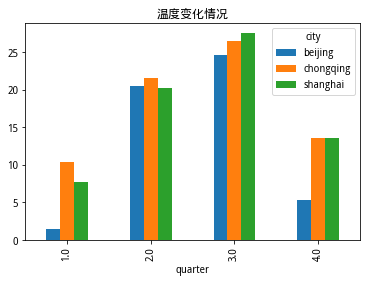

In [22]:
df_tempature_group = plot_of_quarter_city(weather,'temperature')
df_tempature_group.plot(kind='bar')
plt.title("温度变化情况")
plt.show()

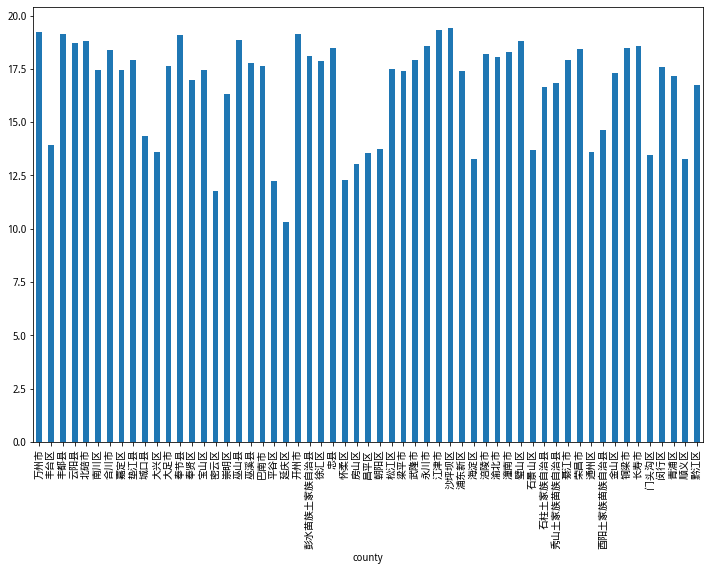

In [23]:
# 将weather按照时间和区进行排序
grouped_temp = weather['temperature'].groupby(weather['county']).mean()
grouped_temp.plot(kind='bar',figsize=(12,8))

In [24]:
def normalization1(x):
    return np.array((x-np.min(x))/(np.max(x)-np.min(x)))

# 选择窗口 data_perpared 是2维数据
def windows_select(data_perpared,feature_size,squence_length,temper_dim):
    features = []
    labels = []
    for i in range(data_perpared.shape[0]-squence_length):
        x = np.array(data_perpared[i:i+squence_length,:]).flatten()
        y = data_perpared[i+squence_length,temper_dim] # 第temper_dim维是温度
        features.append(x)
        labels.append(y)
    features = np.array(features)
    labels = np.array(labels)
    return features,labels

def shuffle_data(features,labels):
    # shuffle data
    shuffle_indicies = np.random.permutation(features.shape[0])
    features = features[shuffle_indicies,:]
    labels = labels[shuffle_indicies]
    return features,labels

# 数据预处理
def get_data(data_perpared,is_joint=False,squence_length=20,feature_size=7,temper_dim=2,train_ratio=0.8,validate_ratio=0.1):
    if not is_joint:
        data_perpared = data_perpared[:,:feature_size] # 取前面7维的数据
        features,labels =windows_select(data_perpared,feature_size,squence_length,temper_dim)
        features,labels = shuffle_data(features,labels)
    else:
        data_perpared[0] = data_perpared[0][:,:feature_size]
        features,labels = windows_select(data_perpared[0],feature_size,squence_length,temper_dim)
        for data in data_perpared[1:]:
            data = data[:,:feature_size] # 取前面7维的数据
            # 对一个地级市内的数据进行分组
            f,l =windows_select(data,feature_size,squence_length,temper_dim)
            features = np.vstack((features,f)) # 垂直拼接
            labels = np.hstack((labels,l))  # 水平拼接
        features,labels = shuffle_data(features,labels)
    print("features.shape",features.shape)
    print("labels.shape",labels.shape)
    # train samples
    train_row = round(features.shape[0]*train_ratio)
    validate_num = round(features.shape[0]*validate_ratio)
    test_num = features.shape[0]-train_row-validate_num
    x_train = np.reshape(features[:train_row,:],(train_row,squence_length,feature_size))
    y_train = np.reshape(labels[:train_row],(train_row,-1))
    # validation samples
    x_val = np.reshape(features[train_row:train_row+validate_num,:],(validate_num,squence_length,feature_size))
    y_val = np.reshape(labels[train_row:train_row+validate_num],(validate_num,-1))
    # test samples
    x_test = np.reshape(features[train_row+validate_num:,:],(test_num,squence_length,feature_size))
    y_test = np.reshape(labels[train_row+validate_num:],(test_num,-1)) 
    print("train_samples:",x_train.shape,y_train.shape)
    print("validate_samples:",x_val.shape,y_val.shape)
    print("test_samples:",x_test.shape,y_test.shape)
    return (x_train,y_train,x_val,y_val,x_test,y_test)
    
# print(normalization1(sortweather['visibility']))
# # print(sortweather['visibility'].describe())
# x_train,y_train,x_val,y_val,x_test,y_test = get_data(sortweather)

In [25]:
from keras import Model
from keras.layers import Input,LSTM,Dropout,Dense,Activation,Conv1D,AveragePooling1D,Bidirectional,Add

def LSTM_model(input_shape):
    x_in = Input(input_shape,name='input')
    x = LSTM(100,name='lstm1')(x_in)# units, input_shape(samples, timesteps, input_dim)
    x = Dropout(0.3,name='drop1')(x)
    x = Dense(100,activation='relu',name='dense1')(x)
    x = Dropout(0.3,name='drop2')(x)
    x = Dense(50,activation='relu',name='dense2')(x)
    x = Dropout(0.2,name='drop3')(x)
    x = Dense(10,activation='relu',name='dense3')(x)
    x = Dropout(0.1,name='drop4')(x)
    x = Dense(1,activation='linear',name='dense4')(x)
    return Model(x_in,x,name='LSTM')

Using TensorFlow backend.


In [26]:
def BLSTM_model(input_shape):
    x_in = Input(input_shape,name='input')
    x = Conv1D(64,2,padding='same',name='conv1')(x_in)
    x = AveragePooling1D(2,name='apool1')(x)
    x1 = Bidirectional(LSTM(80,go_backwards=False),name='forward_lstm')(x)
    x1 = Dropout(0.3,name='drop1')(x1)
    x2 = Bidirectional(LSTM(80,go_backwards=True),name='backward_lstm')(x)
    x2 = Dropout(0.3,name='drop2')(x2)
    x = Add(name='add')([x1,x2])
    x = Dense(100,activation='relu',name='dense1')(x)  
    x = Dropout(0.3,name='drop3')(x)
    x = Dense(50,activation='relu',name='dense2')(x)  # 70
    x = Dropout(0.2,name='drop4')(x)
    x = Dense(10,activation='relu',name='dense3')(x)  # 20
    x = Dropout(0.1,name='drop5')(x)
    x = Dense(1,activation='sigmoid',name='dense4')(x)  #linear
    return Model(x_in,x,name='BLSTM')

In [27]:
# 测试模型
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# 评价指标
def evaluate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    print("mse: ",mse)
    print("mae: ",mae)
    print('rmse: ',rmse)
    print("r2_score:",r2)
    
#  model_path = './checkpoint/otherweather/weights-0.00.h5'
model_path = './checkpoint/weights-temp_acc=0.94.h5'    

def test(model,x_test,y_test):

    model.load_weights(model_path)
    # predict
    y_pred = model.predict(x_test)
    # 评价指标
    evaluate_metrics(y_test,y_pred)
    # plot
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    return y_pred,y_test
    

In [28]:
from keras.optimizers import RMSprop,Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint,EarlyStopping

# 训练和预测
# data_perpared:处理后气象数据（数组），squence_length：窗口大小，temper_dim:温度的维度， feature_size： 特征数
def train_and_predict(data_perpared,is_joint=False,squence_length=30,feature_size=7,temper_dim=2,is_train=True):
    # load data
    x_train,y_train,x_val,y_val,x_test,y_test = get_data(data_perpared,is_joint,squence_length,feature_size,temper_dim)
    input_shape = (squence_length,feature_size)
    # train model
    model = BLSTM_model(input_shape)
    model.compile(loss="mse",optimizer=Adam())
    print(model.summary())
    if is_train:
        cb_ckpt = ModelCheckpoint('./checkpoint/weights.{epoch:02d}-{val_loss:.2f}.h5',monitor='val_loss',
                                  save_best_only=True,mode='min',period=20)
        history = model.fit(x_train,y_train,batch_size=32,epochs=100,
                            validation_data=(x_val,y_val),shuffle=True,
                           callbacks=[cb_ckpt,
                            EarlyStopping(monitor='val_loss',patience=10)])
        plt.plot(history.history['loss'],label='train')
        plt.plot(history.history['val_loss'],label='test')
        plt.legend()
        plt.show()
    else:
        y_pred,y_test = test(model,x_test,y_test)
        return y_pred,y_test

### 在本数据集上测试模型

In [ ]:
from sklearn.compose import ColumnTransformer

# # 对weather 进行数据清理
num_weather = weather.drop(["date",'city','county','station','year'],axis=1)
num_attribs = list(num_weather.columns)
# 处理数值和文本属性的流水线
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("city",OneHotEncoder(),['city']),
])
data_perpared = full_pipeline.fit_transform(weather)
weather_clean = pd.DataFrame(data_perpared,columns=num_attribs+['shanghai','beijing', 'chongqin'])
print(weather_clean.columns)
weather_clean[['date','county']] = weather[['date','county']]

# 按照时间和地区进行排序
sortweather = weather_clean.sort_values(by=['county','date'],ascending=(False,True))
data_perpared_countys = []
# 按照地级市进行分组
for name,group in sortweather.groupby('county'):
    group = group.drop(['date','county'],axis=1)
    group_array = np.array(group)
    data_perpared_countys.append(group_array)
    
print(len(data_perpared_countys))
print(data_perpared_countys[0].shape)

train_and_predict(data_perpared_countys,True,30,26,2,True)


Index(['pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning', 'snow', 'hail', 'wind', 'month', 'week',
       'quarter', 'day', 'shanghai', 'beijing', 'chongqin'],
      dtype='object')
57
(1820, 26)
features.shape (100945, 780)
labels.shape (100945,)
train_samples: (80756, 30, 26) (80756, 1)
validate_samples: (10094, 30, 26) (10094, 1)
test_samples: (10095, 30, 26) (10095, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 26)       0                                            
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 30, 64)       3392        input[0][0]                   

80756/80756 [==============================] - 127s 2ms/step - loss: 0.0012 - val_loss: 7.4320e-04
Epoch 39/100
80756/80756 [==============================] - 128s 2ms/step - loss: 0.0012 - val_loss: 8.0351e-04
Epoch 40/100
80756/80756 [==============================] - 128s 2ms/step - loss: 0.0011 - val_loss: 8.0337e-04
Epoch 41/100
80756/80756 [==============================] - 130s 2ms/step - loss: 0.0012 - val_loss: 7.0070e-04
Epoch 42/100
80756/80756 [==============================] - 129s 2ms/step - loss: 0.0011 - val_loss: 6.9919e-04
Epoch 43/100
80756/80756 [==============================] - 128s 2ms/step - loss: 0.0012 - val_loss: 6.9009e-04
Epoch 44/100
62304/80756 [======================>.......] - ETA: 28s - loss: 0.0011

In [ ]:
model_path = './checkpoint/weights.80-0.00.h5' 
print(data_perpared_countys[0].shape)
y_pred,y_test = train_and_predict(data_perpared_countys,True,30,7,2,False)

In [ ]:
# 绘制温度变化图形
# # 保留温度的最大最小值
temper_max = np.max(weather['temperature'])
temper_min = np.min(weather['temperature'])
# 还原温度值
y_pred_orignal = np.array(y_pred)*(temper_max-temper_min)+temper_min
y_test_orignal = np.array(y_test)*(temper_max-temper_min)+temper_min

evaluate_metrics(y_pred_orignal,y_test_orignal)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.show()
fig1 = plt.figure(figsize=(12,8))
plt.plot(y_pred_orignal,label='y_pred')
plt.plot(y_test_orignal,label='y_test')
plt.legend()
plt.show()

#### 在其他数据集上测试模型

In [ ]:
# 在其他数据集上的测试
other_weather = pd.read_csv('./datasets/data.csv')
print(other_weather.columns)
num_other_weather = other_weather.drop("TIME",axis=1)
num_attribs = list(num_other_weather.columns)
# 处理数值和文本属性的流水线
full_pipeline1 = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
])
other_data_perpared = full_pipeline1.fit_transform(other_weather)
train_and_predict(other_data_perpared,30,6,0,True)


In [ ]:
 model_path = './checkpoint/otherweather/weights.10-0.00.h5'
y_pred,y_test = train_and_predict(other_data_perpared,30,6,0,False)

In [ ]:
# 绘制温度变化图形
# # 保留温度的最大最小值
temper_max = np.max(other_weather['TEMPERATURE [degC]'])
temper_min = np.min(other_weather['TEMPERATURE [degC]'])
# 还原温度值
y_pred_orignal = np.array(y_pred)*(temper_max-temper_min)+temper_min
y_test_orignal = np.array(y_test)*(temper_max-temper_min)+temper_min

# error rate
evaluate_metrics(y_pred_orignal,y_test_orignal)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.show()
fig1 = plt.figure(figsize=(12,8))
plt.plot(y_pred_orignal,label='y_pred')
plt.plot(y_test_orignal,label='y_test')
plt.legend()
plt.show()

### 预测其他城市

### 训练模型

In [ ]:
# 训练一个二元分类器测试精度
weather_train = strat_train_set.drop("phenomenon",axis=1)
weather_train_label = strat_train_set["phenomenon"]

x_train = full_pipeline.transform(weather_train)
y_train = weather_train_label
print(x_train.shape)
y_train_0 = (y_train==0) # 0代表好的天气
print(y_train_0.value_counts())


some_data = weather_train.iloc[:100]
some_labels = weather_train_label.iloc[:100]
some_data_perpared = full_pipeline.transform(some_data)
print(some_data_perpared.shape)
some_labels_0 = (some_labels==0)
print(some_labels_0.value_counts())


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty,random_state=42)
sgd_clf.fit(x_train,y_train_0)

In [ ]:
print(some_data_perpared.shape)
y_pred = sgd_clf.predict(some_data_perpared)
n_correct = sum(y_pred==some_labels_0)
print(n_correct)

In [ ]:
# 使用交叉验证测量精度
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_0,cv=3,scoring='accuracy')